# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import ttest_ind
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [210]:
tmp = df['temperature']
np.mean(tmp)

98.24923076923078

In [211]:
np.std(tmp)

0.7303577789050377

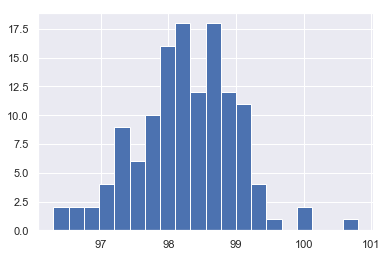

In [212]:
plt.hist(df.temperature, bins = 20)
plt.xlabel = ('temperature')
plt.ylabel = ('count')
plt.show()

## **Q1:  Is the distribution of body temperatures normal?**


### Answer: Yes, the distribution of body temperatures is Normal. The data looks symmetrical & the statistical methods provided high p values when testing for fit against a Normal curve.


Normal conditions with T-intervals

* **Sample size >= 30** 
    * The sample size for the data is 130, this meets the >= 30 criteria
* If sample size is <30, then the original data distribution should be normal or if the data is approx. symmetric around the mean.
    * see below for graphical displays of the data


### Normality Tests Graphical Methods

**Below you can see that the data is roughly bell shaped & symmetrical when graphically displayed in a histogram**

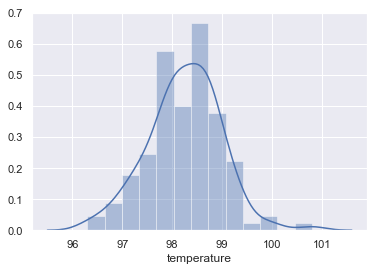

In [213]:
sns.distplot(tmp)

**Using the normal probability plot we see the data falls primarily on the line closely fitting the pattern of a normal curve.
There are some deviations at the bottom and top of the plot.**

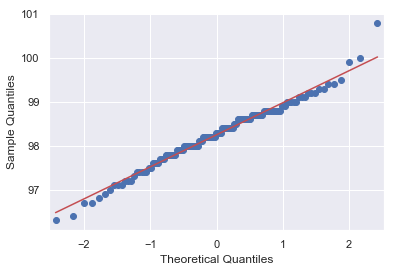

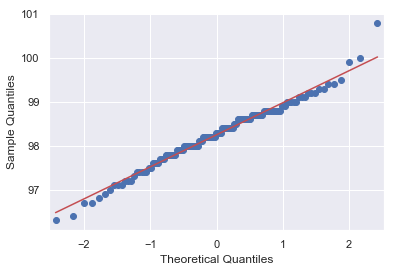

In [214]:
qqplot(tmp, line = 's')

### Normality Test Statistical Method

**Shapiro-Wilk Test** 

The Shapiro-Wilk tests that a sample came from normally distributed population.

H0 assumues that the sample is derived from a Normal distribution.
The p-value below is .23, above .05, we fail to reject H0. 

In [215]:
stat, p = shapiro(tmp)
print ('P-Value:', p)

P-Value: 0.2331680953502655


**D’Agostino’s K^2 Test** 

The D'Angostrino's K^2 test calculates kurtosis and skewness to determine if the data distrbution is Normal.

H0 assumues that the sample is derived from a Normal distribution.
The p-value below is .26, above .05, we fail to reject H0. 

In [216]:
stat, p = normaltest(tmp)
print ('P-Value:', p)

P-Value: 0.2587479863488254


## **Q2:  Is the sample size large? Are the observations independent?**

### Answer: Yes, the sample size is large enough. There are > 30 observations in the dataset.
The observations are indeed independent. The sample is less than 10% of the population.

In [217]:
obs = tmp.count()
print ('There are', obs, 'observations')

There are 130 observations


## **Q3: Is the true population mean really 98.6 degrees F?**
1. First, try a bootstrap hypothesis test.
2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
3. In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
4. Now try using the other test. How is the result be different? Why?

**1. Bootstrap Hypothesis**

H0: The true population mean is 98.6F

H1: The true population mean is not 98.6F

Test Statistic: Mean of the bootstrap sample minus the null value of 98.6F

There were 0/100 obs of getting a value of the observed difference between 98.6F and the simulated data. The resulting p-value is less than 1/100000.

#### Simulate the data that the true mean of the temperature data is the same as 98.6F. To achieve this, I will shift the data so the mean matches 98.6F.

In [218]:
"""Shifting the data"""
pop_mean = 98.6
tmp_shift = tmp - np.mean(tmp) + pop_mean

In [219]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [220]:
def draw_bs_reps(data, func, size = 1):
    """ Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

Using bootstrapping on the shifted data to simulate data acquisition under the null hypothesis.

In [221]:
"""Computing the test statistic. The difference of the mean of the bootstrap sample minus 98.6F"""
def diff_from_pop (data, pop_value = 98.6):
    return np.mean(data) - pop_value

In [222]:
"""Find the difference between the observed data and the population value of 98.6"""
diff_obs = diff_from_pop(tmp)
diff_obs

-0.35076923076921673

Use the 'draw_bs_reps' function to generate the bootstrap replicates. The value of the tests statistics computed from a bootstrap sample. The shifted data is used because this is the data used to simulate the null hypothesis.

In [223]:
bs_replicates = draw_bs_reps(tmp_shift, diff_from_pop, 100000)

In [224]:
p_value = np.sum(bs_replicates <= diff_obs) / 100000
p_value

0.0

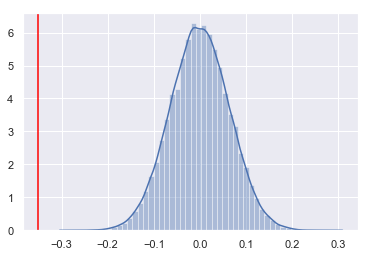

In [225]:
"""Plotting the bs_replicates and the observed value. The observed value (the red line) is well below the mean value."""

sns.distplot(bs_replicates)
plt.axvline(x=diff_obs, color = 'red')
plt.xlabel = ('Temperature')
plt.ylabel = ('PDF')
plt.show()

In [226]:
"""The min observed replicate is -.27"""
np.min(bs_replicates)

-0.28384615384615586

**2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

I would use a One Sample test - because I am testing whether the population mean (98.6F) is different than the sample mean (the data)

H0: The true population mean is 98.6F

H1: The true population mean is not 98.6F

Signifance level is .05

p value is less than .05%, we can reject the null hypothesis. See both methods below

In [227]:
# sample size
n = 130

# assumed population mean
X = 98.6

# sample mean
xbar = np.mean(tmp)

#standard deviation
s = np.std(tmp)

# estimating population standard deviation with the sample standard deviation (s). This will be a good estimate with the sample size >100
std = s/(np.sqrt(n))

print (xbar, s, std)

t_val = (xbar - X )/ std
t_val

#This t value cannot be looked up on the t-table

98.24923076923078 0.7303577789050377 0.06405661469519336


-5.475925202078116

### ttest_1samp function from scipy

In [228]:
t_val, p_val = ttest_1samp(tmp, X)
print ('p value is ', p_val)

p value is  2.4106320415561276e-07


**3. In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?**


It is more appropriate to use the t-statistic, because we don't know the population standard deviation to find the z statistic. 
We need to use the sample standard deviation, when using this statistics, we must use the t-statistic. Using the z-statistic 
will underestimate the true value

**4. Now try using the other test. How is the result be different? Why?**

The difference in result is primarily through the p-value. It is greatly underestimated.

In [229]:
z_val, p_val = ztest(tmp, value = X)
print (z_val, p_val)

-5.4548232923645195 4.9021570141012155e-08


## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    * Which one is the correct one to use?
            t-statistic is still the correct one to use, as we do not know the population standard deviation
    * What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?
            z & t are a lot closer together. The variability among z and t depends on the number of samples

In [230]:
#generating a random sample of size 10
rs_10 = np.random.choice(tmp, size=10)

In [231]:

# repeating ttest using sample size 10
t_val, p_val = ttest_1samp(rs_10, X)
print ('p value is ', p_val)

p value is  0.014073477032631518


In [232]:
#repeating ztest using sample size 10
z_val, p_val = ztest(rs_10, value = X)
print (z_val, p_val)

-3.037555626823272 0.0023850537971063703


## Q5 At what temperature should we consider someone's temperature to be "abnormal"?
    * As in the previous example, try calculating everything using the boostrap approach, 
        as well as the frequentist approach.
    
    * Start by computing the margin of error and confidence interval. When calculating the confidence interval,
        keep in mind that you should use the appropriate formula for one draw, and not N draws.

### Bootstrap approach

In [233]:
bs_mean = draw_bs_reps (tmp, np.mean, 10000)

In [234]:
conf_int = np.percentile(bs_mean, [2.5, 97.5])
conf_int

array([98.12153846, 98.37615385])

In [235]:
print("Someone's temperature less than" ,conf_int[0] ,'and more than' ,conf_int[1],'would be considered abnormal.')

Someone's temperature less than 98.12153846153845 and more than 98.37615384615383 would be considered abnormal.


### Frequentist approach

In [236]:
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(tmp), scale=np.std(tmp))
conf_int

(96.81775582674824, 99.68070571171332)

In [237]:
print("Someone's temperature less than" ,conf_int[0] ,'and more than' ,conf_int[1],'would be considered abnormal.')

Someone's temperature less than 96.81775582674824 and more than 99.68070571171332 would be considered abnormal.


## Q6: Is there a significant difference between males and females in normal temperature?
 

 #### Yes, the null hypothesis that there is no difference between male and female temperature can be rejected, p value <.05
 
 * What testing approach did you use and why?
           I used a two-sample bootstrap hypothesis test rather than the permutation test. The two sample test will test if males & females have the same mean temperature, whereas the permutation test will measure if the two samples have the same distribution.
   * Write a story with your conclusion in the context of the original problem.

#### Bootstrap approach

In [238]:
#select only male / female temps and place them in seperate variables
m_tmps = df[df['gender'] == 'M'].temperature
f_tmps = df[df['gender'] == 'F'].temperature

#difference of the means for male/female temperatures
mf_diff_obs = np.mean(m_tmps) - np.mean(f_tmps)


In [239]:
#Generate shifted data sets for both males/females so that the means of each is the mean of the total dataset together
m_tmps_shift = m_tmps - np.mean(m_tmps) + np.mean(tmp)
f_tmps_shift = f_tmps - np.mean(f_tmps) + np.mean(tmp)

In [240]:
#Generate bootstrap replicates of the mean each for the two shifted arrays
bs_reps_m = draw_bs_reps(m_tmps_shift, np.mean, 10000)
bs_reps_f = draw_bs_reps(f_tmps_shift, np.mean, 10000)

#get replicates of difference of means
bs_reps = bs_reps_m - bs_reps_f


In [241]:
#compute and print p-value
p = np.sum(bs_reps <= mf_diff_obs) / len(bs_reps)
p

0.0114

#### Frequentist approach

In [242]:
#  two-sample t-test
t_val, p_val = ttest_ind(m_tmps, f_tmps)
print (p_val)

0.02393188312239561


From the data collected, it would seem that there is evidence that the 'normal' body temperature is different from the population value of 98.6F

A temperature outside of a range from 96.82 and 99.68 would be considered abnormal.

There seems to be a significant difference between mean male and female body temperatures